<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Sistema Predictor de grupos relacionados por el diagn√≥stico</font></b></h1>
        <h2><font color='0B5345'>Luisa Enciso - Mar√≠a Ostos - Santiago Rivera</font></h2>
    </div>
</div>


In [4]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt

In [5]:
def mostrar_informe(df):
    print("Informe estad√≠stico de la base de datos")
    print("="*50, "\n")

    # 1. Informaci√≥n general
    print(f"N√∫mero de registros: {df.shape[0]}")
    print(f"N√∫mero de columnas: {df.shape[1]}\n")

    # 2. Valores nulos por columna
    print("Valores nulos por columna:")
    print(df.isna().sum())
    print("\n")

    # 3. Valores √∫nicos por columna
    print("N√∫mero de valores √∫nicos por columna:")
    print(df.nunique())
    print("\n")

    # 4. Estad√≠sticas descriptivas para columnas num√©ricas
    print("Estad√≠sticas descriptivas (num√©ricas):")
    print(df.describe())
    print("\n")

    # 5. Frecuencias para variables categ√≥ricas
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(cat_cols) > 0:
        print("Frecuencias para variables categ√≥ricas:")
        for col in cat_cols:
            print(f"\nColumna: {col}")
            print(df[col].value_counts(dropna=False))
    else:
        print("No se encontraron columnas categ√≥ricas.")

<hr>

# **Inspecci√≥n de la base de datos**

In [8]:
# Ruta del archivo Excel
archivo_excel = 'DataBase.xlsx'
# Cargar el archivo Excel
df = pd.read_excel(archivo_excel, engine='openpyxl')
# Mostrar las primeras filas
df.head()

Num caso  Aseguradora -C√≥digo- Aseguradora -Descripci√≥n-  Edad Grupo Edad  \
0  413799.0                   204            Aseguradora_29    38      35-39   
1  412359.0                   313            Aseguradora_56    27      25-29   
2  412552.0                   313            Aseguradora_56    39      35-39   
3  414131.0                   227            Aseguradora_46    24      20-24   
4  410573.0                   227            Aseguradora_46    60      60-64   

  Sexo  Codigo de ciudad  Fecha de ingreso Tipo de ingreso  Fecha de egreso  \
0    F              5001          30052005        URGENCIA         19062005   
1    M              5088          11032005        URGENCIA         10042005   
2    M              5001          20032005        URGENCIA         10042005   
3    M              5001          20062005        URGENCIA         22062005   
4    M              5001          24112004        URGENCIA          7012005   

   ...  Proc28  Proc29 Proc30     Tipo servicio  Causa Basica de muerte  \
0  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
1  ...     NaN     NaN    NaN         NO APLICA                     NaN   
2  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
3  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
4  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   

  Infecciones Infecci√≥n Quirurgica GRD -C√≥digo  \
0          NO                   NO       14143   
1          NO                   NO      184153   
2          NO                   NO      184153   
3          NO                   NO      184153   
4          NO                   NO      184112   

                                    GRD -Descripci√≥n Tipo GRD  
0   MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC        M  
1  MH INFECCI√ìN POR VIRUS DE INMUNODEFICIENCIA HU...        M  
2  MH INFECCI√ìN POR VIRUS DE INMUNODEFICIENCIA HU...        M  
3  MH INFECCI√ìN POR VIRUS DE INMUNODEFICIENCIA HU...        M  
4  MH INFECCIONES POST OPERATORIAS Y POSTRAUM√ÅTIC...        M  

[5 rows x 68 columns]

## **Informe Estad√≠stico Inicial de la Base de Datos**

In [9]:
df_informe = pd.read_excel(archivo_excel, engine='openpyxl')
mostrar_informe(df_informe)

Informe estad√≠stico de la base de datos

N√∫mero de registros: 27869
N√∫mero de columnas: 68

Valores nulos por columna:
Num caso                     1
Aseguradora -C√≥digo-         0
Aseguradora -Descripci√≥n-    0
Edad                         0
Grupo Edad                   0
                            ..
Infecciones                  0
Infecci√≥n Quirurgica         0
GRD -C√≥digo                  0
GRD -Descripci√≥n             0
Tipo GRD                     0
Length: 68, dtype: int64


N√∫mero de valores √∫nicos por columna:
Num caso                     7900
Aseguradora -C√≥digo-           62
Aseguradora -Descripci√≥n-      71
Edad                          108
Grupo Edad                     20
                             ... 
Infecciones                     4
Infecci√≥n Quirurgica            4
GRD -C√≥digo                   608
GRD -Descripci√≥n              608
Tipo GRD                        4
Length: 68, dtype: int64


Estad√≠sticas descriptivas (num√©ricas):
            Num ca

## 1. Descripci√≥n General

- **N√∫mero total de registros:** 27,869
- **N√∫mero total de columnas:** 68

Este informe presenta un an√°lisis descriptivo preliminar con el fin de entender la estructura, calidad y caracter√≠sticas generales del conjunto de datos.



## 2. Calidad de los Datos

- **Valores nulos por columna:**
    
    La mayor√≠a de las columnas no presentan valores nulos. Se identifica 1 registro con valor nulo en la columna `Num caso`.
      



## 3. Distribuci√≥n de Datos Categ√≥ricos

Se presentan las frecuencias de las principales variables categ√≥ricas para identificar posibles valores at√≠picos o inconsistencias, adem√°s de observar la distribuci√≥n general:

- **Sexo:**
    - Masculino (M): 14,353
    - Femenino (F): 13,512
    - Valores inconsistentes (m, f): 4 (corregir para homogeneizar)
- **Tipo de ingreso:**
    - Urgencia: 25,570
    - Programado: 2,294
    - Valores inconsistentes (variaciones en may√∫sculas/min√∫sculas): corregir para uniformidad
- **Cuidados intensivos:**
    - NO: 26,681
    - SI: 1,182
    - Valores inconsistentes (variaciones en may√∫sculas/min√∫sculas): corregir
- **Grupo Etario:**
    
    Distribuci√≥n detallada por rangos de edad, destacando grupos mayores (75-79, 80-84 a√±os) con mayor frecuencia.
    
- **Aseguradora:**
    
    71 categor√≠as, con 5 aseguradoras predominantes que concentran la mayor√≠a de los registros.
    
- **Diagn√≥sticos (Dx principal y Dxr 1-9):**
    
    Amplia variedad con valores NaN significativos en las √∫ltimas columnas de diagn√≥sticos secundarios.
    


## 4. Estad√≠sticas Descriptivas para Variables Num√©ricas

- **Edad:**
    - Media: 57.7 a√±os
    - Rango: 0 a 109 a√±os
    - Desviaci√≥n est√°ndar: 24.17
- **D√≠as de estancia hospitalaria:**
    - Media: 8.45 d√≠as
    - Rango: 0 a 174 d√≠as
    - Mediana: 6 d√≠as
- **D√≠as en Unidad de Cuidados Intensivos:**
    - Media: 0.38 d√≠as
    - Alta dispersi√≥n con m√°ximo de 92 d√≠as, pero la mayor√≠a sin estancia en UCI.
    
- **Variables de Procedimientos (Proc22 a Proc30):**
    
    Presentan muchos valores faltantes (solo disponibles en pocas observaciones), con medias alrededor de 83-89 y alta variabilidad en algunos casos. Se debe evaluar relevancia para an√°lisis futuros.
    



## 5. Observaciones Generales
- Unificar formatos en variables categ√≥ricas (ej. may√∫sculas/min√∫sculas).
- Tratar valores faltantes, en particular en columnas diagn√≥sticas y procedimientos.
- Validar posibles registros duplicados.
- Eliminar categor√≠as muy espec√≠ficas o poco frecuentes en variables categ√≥ricas para evitar ruido.



## 6. Conclusiones preliminares

El dataset es amplio y contiene informaci√≥n cl√≠nica valiosa. Se evidencia buena calidad general en t√©rminos de datos faltantes, salvo excepciones puntuales. La distribuci√≥n etaria y los diagn√≥sticos principales presentan un perfil coherente para un estudio de an√°lisis de gesti√≥n hospitalaria. Sin embargo, es imprescindible realizar un proceso de limpieza y transformaci√≥n para garantizar la calidad y precisi√≥n en an√°lisis posteriores.

<hr>

# **Limpieza de la base de datos**

In [10]:
# ====================================================================
# 1. LIMPIEZA B√ÅSICA DE TEXTO
# ====================================================================
# Se estandarizan los textos a may√∫sculas y se eliminan las tildes,
# aplicando esta limpieza √∫nicamente a las columnas de tipo string
# (sin afectar columnas num√©ricas). Adem√°s, se normalizan los nombres
# de las columnas.
# ====================================================================

def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = texto.upper()
        texto = unicodedata.normalize('NFKD', texto)
        texto = ''.join([c for c in texto if not unicodedata.combining(c)])
        return texto
    return texto

# Aplicar solo a columnas de texto
columnas_texto = df.select_dtypes(include='object').columns
df[columnas_texto] = df[columnas_texto].applymap(limpiar_texto)

# Limpiar nombres de columnas
df.columns = [limpiar_texto(col) for col in df.columns]

df.head()


<ipython-input-10-3508867996>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columnas_texto] = df[columnas_texto].applymap(limpiar_texto)


NUM CASO  ASEGURADORA -CODIGO- ASEGURADORA -DESCRIPCION-  EDAD GRUPO EDAD  \
0  413799.0                   204            ASEGURADORA_29    38      35-39   
1  412359.0                   313            ASEGURADORA_56    27      25-29   
2  412552.0                   313            ASEGURADORA_56    39      35-39   
3  414131.0                   227            ASEGURADORA_46    24      20-24   
4  410573.0                   227            ASEGURADORA_46    60      60-64   

  SEXO  CODIGO DE CIUDAD  FECHA DE INGRESO TIPO DE INGRESO  FECHA DE EGRESO  \
0    F              5001          30052005        URGENCIA         19062005   
1    M              5088          11032005        URGENCIA         10042005   
2    M              5001          20032005        URGENCIA         10042005   
3    M              5001          20062005        URGENCIA         22062005   
4    M              5001          24112004        URGENCIA          7012005   

   ...  PROC28  PROC29 PROC30     TIPO SERVICIO  CAUSA BASICA DE MUERTE  \
0  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
1  ...     NaN     NaN    NaN         NO APLICA                     NaN   
2  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
3  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
4  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   

  INFECCIONES INFECCION QUIRURGICA GRD -CODIGO  \
0          NO                   NO       14143   
1          NO                   NO      184153   
2          NO                   NO      184153   
3          NO                   NO      184153   
4          NO                   NO      184112   

                                    GRD -DESCRIPCION TIPO GRD  
0   MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC        M  
1  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
2  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
3  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
4  MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...        M  

[5 rows x 68 columns]

In [11]:
# ================================================================
# 2. AN√ÅLISIS DE CALIDAD DE LAS COLUMNAS
# ================================================================
# Se realiza un diagn√≥stico exploratorio por columna que incluye:
# - Conteo de valores nulos
# - N√∫mero de valores √∫nicos
# - Ejemplos representativos de valores
# - Identificaci√≥n de columnas con baja utilidad (e.g., constantes)
# ================================================================

print('--- Valores NaN por columna ---')
print(df.isna().sum())

descripcion_columnas = []
for col in df.columns:
    valores_unicos = df[col].nunique(dropna=True)
    muestra_valores = df[col].unique()[:5]
    descripcion_columnas.append({
        'columna': col,
        'valores_unicos': valores_unicos,
        'muestra_valores': muestra_valores
    })

print('\n--- Resumen de columnas ---')
for desc in descripcion_columnas:
    print(f"Columna: {desc['columna']}")
    print(f"  Valores √∫nicos: {desc['valores_unicos']}")
    print(f"  Ejemplo de valores: {desc['muestra_valores']}")
    if desc['valores_unicos'] == 1:
        print('  -> ¬°OJO! Solo hay un valor √∫nico.')
    print()
df.head()

--- Valores NaN por columna ---
NUM CASO                     1
ASEGURADORA -CODIGO-         0
ASEGURADORA -DESCRIPCION-    0
EDAD                         0
GRUPO EDAD                   0
                            ..
INFECCIONES                  0
INFECCION QUIRURGICA         0
GRD -CODIGO                  0
GRD -DESCRIPCION             0
TIPO GRD                     0
Length: 68, dtype: int64

--- Resumen de columnas ---
Columna: NUM CASO
  Valores √∫nicos: 7900
  Ejemplo de valores: [413799. 412359. 412552. 414131. 410573.]

Columna: ASEGURADORA -CODIGO-
  Valores √∫nicos: 62
  Ejemplo de valores: [204 313 227 112 221]

Columna: ASEGURADORA -DESCRIPCION-
  Valores √∫nicos: 71
  Ejemplo de valores: ['ASEGURADORA_29' 'ASEGURADORA_56' 'ASEGURADORA_46' 'ASEGURADORA_21'
 'ASEGURADORA_28']

Columna: EDAD
  Valores √∫nicos: 108
  Ejemplo de valores: [38 27 39 24 60]

Columna: GRUPO EDAD
  Valores √∫nicos: 20
  Ejemplo de valores: ['35-39' '25-29' '20-24' '60-64' '75-79']

Columna: SEXO
  V

NUM CASO  ASEGURADORA -CODIGO- ASEGURADORA -DESCRIPCION-  EDAD GRUPO EDAD  \
0  413799.0                   204            ASEGURADORA_29    38      35-39   
1  412359.0                   313            ASEGURADORA_56    27      25-29   
2  412552.0                   313            ASEGURADORA_56    39      35-39   
3  414131.0                   227            ASEGURADORA_46    24      20-24   
4  410573.0                   227            ASEGURADORA_46    60      60-64   

  SEXO  CODIGO DE CIUDAD  FECHA DE INGRESO TIPO DE INGRESO  FECHA DE EGRESO  \
0    F              5001          30052005        URGENCIA         19062005   
1    M              5088          11032005        URGENCIA         10042005   
2    M              5001          20032005        URGENCIA         10042005   
3    M              5001          20062005        URGENCIA         22062005   
4    M              5001          24112004        URGENCIA          7012005   

   ...  PROC28  PROC29 PROC30     TIPO SERVICIO  CAUSA BASICA DE MUERTE  \
0  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
1  ...     NaN     NaN    NaN         NO APLICA                     NaN   
2  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
3  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
4  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   

  INFECCIONES INFECCION QUIRURGICA GRD -CODIGO  \
0          NO                   NO       14143   
1          NO                   NO      184153   
2          NO                   NO      184153   
3          NO                   NO      184153   
4          NO                   NO      184112   

                                    GRD -DESCRIPCION TIPO GRD  
0   MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC        M  
1  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
2  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
3  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
4  MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...        M  

[5 rows x 68 columns]

In [12]:
# =============================================================================
# 3. NORMALIZACI√ìN DE VALORES EQUIVALENTES
# =============================================================================
# Se unifican valores sem√°nticamente equivalentes que presentan
# diferencias en su escritura. Ejemplo: "URGENCIAS PEDIATRICAS" ‚Üí "URGENCIA".
# Esta etapa mejora la consistencia y reduce la cardinalidad de las categor√≠as.
# =============================================================================

normalizaciones = {
    'TIPO DE INGRESO': {
        'URGENCIAS': 'URGENCIA',
        'URGENCIA ADULTOS': 'URGENCIA',
        'U. ADULTOS': 'URGENCIA',
        'URGENCIA PEDIATRICA': 'URGENCIA',
        'URGENCIA OBSTETRICA': 'URGENCIA',
    },
    'SITUACION AL ALTA': {
        'MUERTO': 'FALLECIDO',
        'DEFUNCION': 'FALLECIDO',
    },
    'SERVICIOALTA': {
        'URGENCIAS': 'URGENCIA',
        'U. ADULTOS': 'URGENCIA',
    }
}

for columna, reemplazos in normalizaciones.items():
    if columna in df.columns:
        df[columna] = df[columna].replace(reemplazos)

print("Valores equivalentes normalizados.")
df.head()

Valores equivalentes normalizados.


NUM CASO  ASEGURADORA -CODIGO- ASEGURADORA -DESCRIPCION-  EDAD GRUPO EDAD  \
0  413799.0                   204            ASEGURADORA_29    38      35-39   
1  412359.0                   313            ASEGURADORA_56    27      25-29   
2  412552.0                   313            ASEGURADORA_56    39      35-39   
3  414131.0                   227            ASEGURADORA_46    24      20-24   
4  410573.0                   227            ASEGURADORA_46    60      60-64   

  SEXO  CODIGO DE CIUDAD  FECHA DE INGRESO TIPO DE INGRESO  FECHA DE EGRESO  \
0    F              5001          30052005        URGENCIA         19062005   
1    M              5088          11032005        URGENCIA         10042005   
2    M              5001          20032005        URGENCIA         10042005   
3    M              5001          20062005        URGENCIA         22062005   
4    M              5001          24112004        URGENCIA          7012005   

   ...  PROC28  PROC29 PROC30     TIPO SERVICIO  CAUSA BASICA DE MUERTE  \
0  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
1  ...     NaN     NaN    NaN         NO APLICA                     NaN   
2  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
3  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   
4  ...     NaN     NaN    NaN  URGENCIA ADULTOS                     NaN   

  INFECCIONES INFECCION QUIRURGICA GRD -CODIGO  \
0          NO                   NO       14143   
1          NO                   NO      184153   
2          NO                   NO      184153   
3          NO                   NO      184153   
4          NO                   NO      184112   

                                    GRD -DESCRIPCION TIPO GRD  
0   MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC        M  
1  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
2  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
3  MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...        M  
4  MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...        M  

[5 rows x 68 columns]

In [13]:
# ==========================================================================
# 4. ELIMINACI√ìN DE COLUMNAS PROBLEM√ÅTICAS
# ==========================================================================
# Se descartan columnas que aportan poco valor al an√°lisis:
# - Columnas con m√°s del 70% de valores nulos
# - Columnas con un √∫nico valor distinto (baja variabilidad)
# - Columnas administrativas o irrelevantes para el objetivo del an√°lisis
# ==========================================================================

# Columnas con muchos nulos
umbral_nan = 0.7
columnas_a_eliminar = df.columns[df.isna().mean() > umbral_nan].tolist()

# Columnas con un solo valor
columnas_un_valor = [col for col in df.columns if df[col].nunique() == 1]

# Columnas irrelevantes conocidas
columnas_irrelevantes = [
    'NUM CASO', 'ASEGURADORA -CODIGO-', 'ASEGURADORA -DESCRIPCION-', 'CODIGO DE CIUDAD',
    'FECHA DE EGRESO', 'CODIGO CAUSA EXTERNA', 'DIAS ESTANCIA', 'SERVICIOALTA',
    'CUIDADOS INTENSIVOS', 'DIAS DE UNIDAD CUIDADO INTENSIVO',
    'SITUACION AL ALTA', 'CAUSA BASICA DE MUERTE', 'INFECCIONES',
    'INFECCION QUIRURGICA', 'DX PRINCIPAL DE EGRESO ', 'DX PRINCIPAL DE EGRESO .1',
    'TIPO SERVICIO', 'PROC1','PROC2','PROC3', 'GRD -DESCRIPCION', 'TIPO GRD','GRUPO EDAD','DX DE INGRESO'
]

# Unificar y eliminar
todas_a_eliminar = list(set(columnas_a_eliminar + columnas_un_valor + columnas_irrelevantes))
df = df.drop(columns=[col for col in todas_a_eliminar if col in df.columns])
print(f"Columnas eliminadas: {todas_a_eliminar}")
df.head()

Columnas eliminadas: ['DIAS DE UNIDAD CUIDADO INTENSIVO', 'ASEGURADORA -DESCRIPCION-', 'PROC18', 'PROC2', 'DX DE INGRESO', 'SITUACION AL ALTA', 'PROC3', 'PROC20', 'ASEGURADORA -CODIGO-', 'PROC23', 'GRD -DESCRIPCION', 'PROC5', 'DX PRINCIPAL DE EGRESO .1', 'DX PRINCIPAL DE EGRESO ', 'DIAS ESTANCIA', 'CODIGO CAUSA EXTERNA', 'PROC27', 'PROC13', 'PROC29', 'FECHA DE EGRESO', 'PROC6', 'PROC7', 'DXR 10 ', 'PROC9', 'PROC16', 'PROC10', 'PROC17', 'SERVICIOALTA', 'PROC14', 'CAUSA BASICA DE MUERTE', 'PROC28', 'PROC8', 'PROC11', 'PROC26', 'NUM CASO', 'TIPO GRD', 'CAUSA EXTERNA', 'PROC19', 'PROC30', 'CODIGO DE CIUDAD', 'PROC15', 'PROC24', 'CUIDADOS INTENSIVOS', 'INFECCIONES', 'PROC4', 'PROC22', 'DXR 7', 'PROC12', 'PROC21', 'DXR 8', 'INFECCION QUIRURGICA', 'GRUPO EDAD', 'PROC25', 'PROC1', 'DXR 9', 'TIPO SERVICIO']


EDAD SEXO  FECHA DE INGRESO TIPO DE INGRESO  \
0    38    F          30052005        URGENCIA   
1    27    M          11032005        URGENCIA   
2    39    M          20032005        URGENCIA   
3    24    M          20062005        URGENCIA   
4    60    M          24112004        URGENCIA   

                                DX PPAL 3 CARACTERES DXR 1 DXR 2 DXR 3 DXR 4  \
0                                   INFARTO CEREBRAL  I652  C189  C787  C788   
1  ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...  B210  B204  B162  A530   
2  ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...  B451  G052  B588   D70   
3  ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...  B200  B210  A600  N518   
4  COMPLICACIONES DE PROCEDIMIENTOS NO CLASIFICAD...  Y838  C140  N390  B961   

  DXR 5 DXR-6  GRD -CODIGO  
0  N390  A048        14143  
1  D538  A071       184153  
2  D698  A072       184153  
3  A530  A073       184153  
4  B962  A099       184112

In [14]:
# ================================================================
# 5. CODIFICACI√ìN DE VARIABLES
# ================================================================
# - Variables binarias: codificar con 0 y 1.
# - Variables categ√≥ricas frecuentes: codificar por frecuencia.
# ================================================================

from sklearn.preprocessing import MinMaxScaler

# 1. Codificaci√≥n binaria
df['SEXO'] = df['SEXO'].map({'F': 0, 'M': 1})
df['TIPO DE INGRESO'] = df['TIPO DE INGRESO'].map({'PROGRAMADO': 0, 'URGENCIA': 1})

# 2. Codificaci√≥n por frecuencia (excepto √∫ltima columna)
columnas_objetivo = df.columns[:-1]  # Todas menos la √∫ltima

for col in columnas_objetivo:
    if col in df.columns:
        df[col] = df[col].map(df[col].value_counts())

df.head()



EDAD   SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
0   200  13514                81            25574                    92   
1   231  14355                85            25574                    13   
2   176  14355                88            25574                    10   
3   251  14355                64            25574                   127   
4   408  14355                 2            25574                   226   

   DXR 1  DXR 2  DXR 3  DXR 4  DXR 5  DXR-6  GRD -CODIGO  
0   26.0   18.0   21.0    3.0   95.0    2.0        14143  
1    8.0    7.0    1.0    9.0    7.0    1.0       184153  
2    2.0    2.0    1.0   78.0   10.0    1.0       184153  
3   11.0    3.0   10.0    8.0    2.0    1.0       184153  
4  269.0    1.0  256.0   77.0   71.0   31.0       184112

In [15]:
# ================================================================
# 6. NORMALIZACI√ìN MIN-MAX
# ================================================================
# - Se imputan NaN con 0
# - Se suma un peque√±o epsilon para evitar ceros exactos
# - Se aplica MinMaxScaler para escalar al rango [0, 1]
# - Se reconstruye el DataFrame con los nombres originales
# ================================================================


from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1. Reemplazar NaN por 0
df_clean = df.fillna(0)

# 2. Aumentar ligeramente los valores excepto la √∫ltima columna
epsilon = 1e-3
df_adjusted = df_clean.copy()
df_adjusted.iloc[:, :-1] += epsilon  # Solo las columnas excepto la √∫ltima

# 3. Aplicar MinMaxScaler solo a las columnas excepto la √∫ltima
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_adjusted.iloc[:, :-1])

# 4. Reconstruir el DataFrame escalado
df_f= pd.DataFrame(scaled_values, columns=df.columns[:-1])

# 5. Agregar la √∫ltima columna sin modificar
df_f[df.columns[-1]] = df_adjusted[df.columns[-1]]

# 6. Confirmaci√≥n
print("Normalizaci√≥n Min-Max aplicada.")
df_f.head()



Normalizaci√≥n Min-Max aplicada.


<ipython-input-15-1610336004>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        200.001
1        231.001
2        176.001
3        251.001
4        408.001
          ...   
27864    213.001
27865    501.001
27866    102.001
27867    221.001
27868    359.001
Name: EDAD, Length: 27869, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_adjusted.iloc[:, :-1] += epsilon  # Solo las columnas excepto la √∫ltima
<ipython-input-15-1610336004>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        13514.001
1        14355.001
2        14355.001
3        14355.001
4        14355.001
           ...    
27864    13514.001
27865    14355.001
27866    13514.001
27867    14355.001
27868    14355.001
Name: SEXO, Length: 27869, dtype: float64' has dtype incompatible with int64, please explici

EDAD  SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
0  0.336717   0.0          0.720721              1.0              0.066423   
1  0.389171   1.0          0.756757              1.0              0.008759   
2  0.296108   1.0          0.783784              1.0              0.006569   
3  0.423012   1.0          0.567568              1.0              0.091971   
4  0.688663   1.0          0.009009              1.0              0.164234   

      DXR 1     DXR 2     DXR 3     DXR 4     DXR 5     DXR-6  GRD -CODIGO  
0  0.018895  0.009793  0.012774  0.002669  0.135714  0.003781        14143  
1  0.005814  0.003808  0.000608  0.008007  0.010000  0.001890       184153  
2  0.001453  0.001088  0.000608  0.069395  0.014286  0.001890       184153  
3  0.007994  0.001632  0.006083  0.007117  0.002857  0.001890       184153  
4  0.195494  0.000544  0.155718  0.068505  0.101429  0.058601       184112

In [16]:
# ====================================================================================================
# 7. SELECCI√ìN DE CLASES PREDICTORAS
# ====================================================================================================
# Reduce la cantidad de clases a predecir, limitando el problema a los 30 GRDs m√°s frecuentes.
# ====================================================================================================

N = 30
top_grds = df_f['GRD -CODIGO'].value_counts().head(N).index
df_filtered = df_f[df['GRD -CODIGO'].isin(top_grds)].copy()
df_filtered.head()


EDAD  SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
5   0.859560   1.0          0.693694              1.0              0.354015   
12  0.522843   1.0          0.702703              0.0              0.356204   
15  0.296108   1.0          0.738739              0.0              0.356204   
16  0.664975   0.0          0.576577              1.0              0.867153   
17  0.324873   1.0          0.612613              0.0              0.356204   

       DXR 1     DXR 2     DXR 3     DXR 4     DXR 5     DXR-6  GRD -CODIGO  
5   0.209302  0.019587  0.023723  0.112100  0.135714  0.058601        54123  
12  0.058140  0.224157  0.091849  0.000890  0.002857  0.058601       174133  
15  0.008721  0.051687  0.078467  0.069395  0.462857  0.058601       174132  
16  0.293605  1.000000  0.130170  0.476868  0.135714  0.058601        44172  
17  0.029070  0.224157  0.054745  0.351423  0.030000  0.058601       174133

## **Guardar Base de datos limpia**



In [17]:
# ==============================================================================
# 8. GUARDADO FINAL
# ==============================================================================
# Se guarda el DataFrame limpio y normalizado para futuras etapas del pipeline.
# ==============================================================================

df_filtered.to_csv('DataBaseFinal_Normalizado.csv', index=False, sep=';')
print("Archivo guardado como 'DataBaseFinal_Normalizado.csv'")


Archivo guardado como 'DataBaseFinal_Normalizado.csv'


<hr>

# **Informe del an√°lisis estad√≠stico hecho a la base de datos limpia**

In [18]:
archivo_csv = 'DataBaseFinal_Normalizado.csv'
df_informe_limpio = pd.read_csv(archivo_csv,sep=';')
mostrar_informe(df_informe_limpio)

Informe estad√≠stico de la base de datos

N√∫mero de registros: 8775
N√∫mero de columnas: 12

Valores nulos por columna:
EDAD                    0
SEXO                    0
FECHA DE INGRESO        0
TIPO DE INGRESO         0
DX PPAL 3 CARACTERES    0
DXR 1                   0
DXR 2                   0
DXR 3                   0
DXR 4                   0
DXR 5                   0
DXR-6                   0
GRD -CODIGO             0
dtype: int64


N√∫mero de valores √∫nicos por columna:
EDAD                    100
SEXO                      2
FECHA DE INGRESO         87
TIPO DE INGRESO           2
DX PPAL 3 CARACTERES    102
DXR 1                   118
DXR 2                   117
DXR 3                   105
DXR 4                   106
DXR 5                    99
DXR-6                    83
GRD -CODIGO              30
dtype: int64


Estad√≠sticas descriptivas (num√©ricas):
              EDAD         SEXO  FECHA DE INGRESO  TIPO DE INGRESO  \
count  8775.000000  8775.000000       8775.000000 

## 1. Descripci√≥n General

- **N√∫mero total de registros:** 8,775
- **N√∫mero total de columnas:** 12

La base de datos analizada contiene 8.775 registros distribuidos en 12 variables, correspondientes a informaci√≥n cl√≠nica y administrativa de pacientes hospitalizados. Las variables incluyen datos sociodemogr√°ficos (edad, sexo), administrativos (fecha y tipo de ingreso), diagn√≥sticos principales y relacionados (DX), as√≠ como el c√≥digo GRD correspondiente.

**Nota:** Los valores han sido normalizados (escala de 0 a 1). Esto implica que las interpretaciones deben realizarse considerando dicha transformaci√≥n.


## 2. Calidad de los Datos

No se encontraron valores nulos en ninguna de las variables, lo cual indica un excelente nivel de completitud.
      
## 3. Distribuci√≥n de Datos Categ√≥ricos

Las variables de diagn√≥stico y el c√≥digo GRD muestran una alta diversidad, lo cual evidencia una variedad importante de condiciones cl√≠nicas presentes en la poblaci√≥n.
    

## 4. Estad√≠sticas Descriptivas para Variables Num√©ricas

Dado que los datos han sido preprocesados mediante normalizaci√≥n (min-max scaling entre 0 y 1), las estad√≠sticas representan distribuciones relativas que preservan la forma de los datos originales.
    

## 5. Observaciones Generales
- Las variables SEXO y TIPO DE INGRESO presentan una distribuci√≥n binaria, donde m√°s del 90% de los registros tienen valor "1" en TIPO DE INGRESO.
- La edad muestra una distribuci√≥n asim√©trica hacia la derecha (mayor√≠a de pacientes en edades medias-altas).
- Los diagn√≥sticos relacionados DXR2 a DXR6 tienden a tener valores bajos, lo que sugiere que muchos pacientes no presentan m√∫ltiples diagn√≥sticos asociados, o estos tienen baja frecuencia relativa.

## 6. Conclusiones preliminares

La base de datos ha sido completamente preprocesada y se encuentra en √≥ptimas condiciones para su uso en algoritmos de an√°lisis y modelado, ya que no contiene valores nulos, las variables han sido normalizadas entre 0 y 1, y tanto las variables num√©ricas como las categ√≥ricas est√°n estructuradas y codificadas adecuadamente para garantizar compatibilidad con t√©cnicas de aprendizaje.

<hr>

# **√Årbol de decisi√≥n**

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , KFold
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt



<h2>Carga del archivo csv </h2>
Se procede a la lectura del DataFrame filtrado generado tras el proceso de limpieza, codificaci√≥n y normalizaci√≥n de los datos, correspondiente a un conjunto de datos del registro m√©dico posterior a la estancia hospitalaria, el cual incluye la totalidad de los procedimientos realizados y diagn√≥sticos registrados para cada paciente.

In [20]:
df_filtered.head()

EDAD  SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
5   0.859560   1.0          0.693694              1.0              0.354015   
12  0.522843   1.0          0.702703              0.0              0.356204   
15  0.296108   1.0          0.738739              0.0              0.356204   
16  0.664975   0.0          0.576577              1.0              0.867153   
17  0.324873   1.0          0.612613              0.0              0.356204   

       DXR 1     DXR 2     DXR 3     DXR 4     DXR 5     DXR-6  GRD -CODIGO  
5   0.209302  0.019587  0.023723  0.112100  0.135714  0.058601        54123  
12  0.058140  0.224157  0.091849  0.000890  0.002857  0.058601       174133  
15  0.008721  0.051687  0.078467  0.069395  0.462857  0.058601       174132  
16  0.293605  1.000000  0.130170  0.476868  0.135714  0.058601        44172  
17  0.029070  0.224157  0.054745  0.351423  0.030000  0.058601       174133

<h2>Variables de entrada (features) </h2>
Se seleccionan las caracter√≠sticas correspondientes a los datos relevantes obtenidos durante el proceso de triaje, las cuales permitir√°n predecir el tipo de Grupo Relacionado por el Diagn√≥stico (GRD) que se asignar√° al paciente.

In [21]:
X_DT = df_filtered.drop(columns=["GRD -CODIGO"])
X_DT.head(5)

EDAD  SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
5   0.859560   1.0          0.693694              1.0              0.354015   
12  0.522843   1.0          0.702703              0.0              0.356204   
15  0.296108   1.0          0.738739              0.0              0.356204   
16  0.664975   0.0          0.576577              1.0              0.867153   
17  0.324873   1.0          0.612613              0.0              0.356204   

       DXR 1     DXR 2     DXR 3     DXR 4     DXR 5     DXR-6  
5   0.209302  0.019587  0.023723  0.112100  0.135714  0.058601  
12  0.058140  0.224157  0.091849  0.000890  0.002857  0.058601  
15  0.008721  0.051687  0.078467  0.069395  0.462857  0.058601  
16  0.293605  1.000000  0.130170  0.476868  0.135714  0.058601  
17  0.029070  0.224157  0.054745  0.351423  0.030000  0.058601


<h2>Variables de salida (target) </h2>
Se indica la salida esperada, correspondiente al c√≥digo de GRD, el cual especifica tanto el diagn√≥stico como el tipo de acci√≥n o intervenci√≥n que debe realizarse en el paciente.

In [22]:
Y_DT = df_filtered[["GRD -CODIGO"]]
Y_DT.head(5)

GRD -CODIGO
5         54123
12       174133
15       174132
16        44172
17       174133


<h2>Modelo DecisionTree </h2>
 T√©cnica de aprendizaje autom√°tico, el modelo toma una serie de decisiones en forma de √°rbol. Se establecen condiciones con el objetivo de establecer particiones binarias los m√°s homog√©neas posibles. Se conforma por nodos intermedios  representan soluciones y nodos finales que dan la predicci√≥n que se busca.


*   Se realiza la divisi√≥n del conjunto de datos en entrenamiento y prueba, reservando el 20% para prueba. La divisi√≥n se hace de forma estratificada respecto a la variable objetivo (Y_DT), asegurando que la distribuci√≥n de clases se mantenga en ambos subconjuntos.

In [23]:
X_train_DT, X_test_DT, Y_train_DT, Y_test_DT = train_test_split(X_DT, Y_DT, test_size=0.2,stratify=Y_DT,random_state=42)

print("Train: ",X_train_DT.shape , Y_train_DT.shape)
print("Test: ",X_test_DT.shape , Y_test_DT.shape)

Train:  (7020, 11) (7020, 1)
Test:  (1755, 11) (1755, 1)


*   Se codifican las etiquetas de salida (Y_train_DT y Y_test_DT) mediante LabelEncoder.
*   Se define una rejilla de hiperpar√°metros (param_grid) para explorar diferentes configuraciones del modelo, incluyendo la profundidad del √°rbol, los criterios de divisi√≥n, el n√∫mero m√≠nimo de muestras por nodo y el uso de ponderaci√≥n de clases.
*   Se utiliza GridSearchCV con validaci√≥n cruzada de 5 pliegues para encontrar la mejor combinaci√≥n de hiperpar√°metros en funci√≥n de la precisi√≥n (accuracy).
*   Una vez identificado el mejor modelo, se realizan predicciones sobre el conjunto de prueba (precisi√≥n, sensibilidad, especificidad y puntuaci√≥n F1 para cada clase GRD).

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



 Mejores par√°metros encontrados:
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}

üìä Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

       14221       0.71      0.78      0.75        73
       14222       0.43      0.34      0.38        35
       14263       0.93      0.85      0.89        48
       44153       0.90      0.93      0.92        41
       44161       0.68      0.73      0.71        41
       44162       0.48      0.48      0.48        71
       44163       0.72      0.67      0.69       115
       44171       0.47      0.44      0.45        34
       44172       0.43      0.47      0.45        53
       44173       0.83      0.82      0.82       146
       44181       0.93      1.00      0.96        41
       51153       0.57      0.47      0.52        34
       54122       0.54      0.38      0.45        50
       54123       0.73      0.85      0.79       126
       54

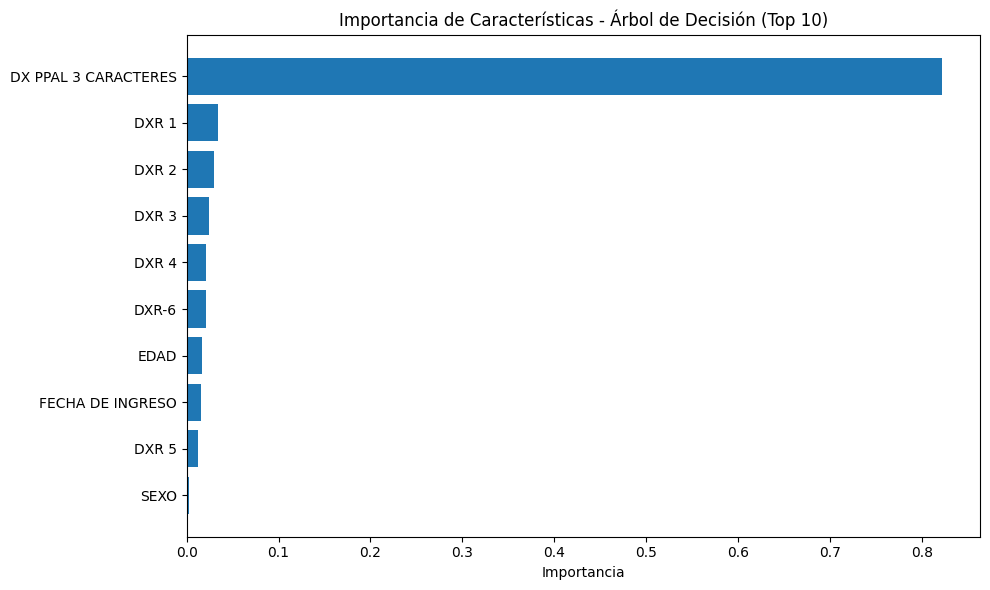

In [24]:
# 1. IMPORTACIONES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# 2. CODIFICAR VARIABLES DE SALIDA
le = LabelEncoder()
Y_train_DT_enc = le.fit_transform(Y_train_DT)
Y_test_DT_enc = le.transform(Y_test_DT)
target_names_str = [str(c) for c in le.classes_]

# 3. HIPERPAR√ÅMETROS Y B√öSQUEDA
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_DT, Y_train_DT_enc)
best_tree = grid_search.best_estimator_

print("\n Mejores par√°metros encontrados:")
print(grid_search.best_params_)

# 4. PREDICCI√ìN Y REPORTE
y_pred = best_tree.predict(X_test_DT)

print("\n Reporte de Clasificaci√≥n:")
print(classification_report(Y_test_DT_enc, y_pred, target_names=target_names_str))

# 5. M√âTRICAS GLOBALES
metrics_summary = pd.DataFrame({
    'M√©trica': [
        'Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-score',
        'Weighted Precision', 'Weighted Recall', 'Weighted F1-score'
    ],
    'Valor': [
        round(accuracy_score(Y_test_DT_enc, y_pred), 4),
        round(precision_score(Y_test_DT_enc, y_pred, average='macro'), 4),
        round(recall_score(Y_test_DT_enc, y_pred, average='macro'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='macro'), 4),
        round(precision_score(Y_test_DT_enc, y_pred, average='weighted'), 4),
        round(recall_score(Y_test_DT_enc, y_pred, average='weighted'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='weighted'), 4)
    ]
})
print("\n M√©tricas globales:")
print(metrics_summary)

# 6. IMPORTANCIA DE CARACTER√çSTICAS
plt.figure(figsize=(10, 6))
importances = best_tree.feature_importances_
indices = np.argsort(importances)[-10:]
features = X_train_DT.columns
plt.barh(features[indices], importances[indices])
plt.title('Importancia de Caracter√≠sticas - √Årbol de Decisi√≥n (Top 10)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()



*   Se implement√≥ StratifiedKFold como m√©todo de validaci√≥n cruzada para garantizar que cada partici√≥n del conjunto de datos mantuviera la misma proporci√≥n de clases presentes en el conjunto original. Esto permiti√≥ una evaluaci√≥n m√°s justa y representativa del modelo, balanceando la influencia de cada clase y asegurando que las m√©tricas obtenidas no estuvieran sesgadas por la presencia desigual de etiquetas. De esta forma, todas las clases contribuyeron de manera equitativa al entrenamiento y validaci√≥n del modelo



In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Codificamos las clases si a√∫n no est√°n codificadas
le = LabelEncoder()
Y_train_DT_enc = le.fit_transform(Y_train_DT)

# Instancia del modelo base
tree_model = DecisionTreeClassifier(random_state=42)

# Instancia de StratifiedKFold con 5 particiones
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Para almacenar las m√©tricas de cada fold
accuracy_scores = []
f1_scores = []

# Ciclo de entrenamiento y validaci√≥n con cada fold
for fold, (train_index, val_index) in enumerate(skf.split(X_train_DT, Y_train_DT_enc), start=1):
    X_fold_train, X_fold_val = X_train_DT.iloc[train_index], X_train_DT.iloc[val_index]
    y_fold_train, y_fold_val = Y_train_DT_enc[train_index], Y_train_DT_enc[val_index]

    # Entrenamiento
    tree_model.fit(X_fold_train, y_fold_train)

    # Predicci√≥n
    y_fold_pred = tree_model.predict(X_fold_val)

    # Evaluaci√≥n
    acc = accuracy_score(y_fold_val, y_fold_pred)
    f1 = f1_score(y_fold_val, y_fold_pred, average='weighted')

    accuracy_scores.append(acc)
    f1_scores.append(f1)

    print(f"Fold {fold}: Accuracy = {acc:.4f}, F1-score = {f1:.4f}")

# Resultados promedio
print("\n=== Resultados Promedio con StratifiedKFold ===")
print(f"Accuracy promedio: {np.mean(accuracy_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1: Accuracy = 0.6588, F1-score = 0.6567
Fold 2: Accuracy = 0.6311, F1-score = 0.6295
Fold 3: Accuracy = 0.6567, F1-score = 0.6593
Fold 4: Accuracy = 0.6268, F1-score = 0.6269
Fold 5: Accuracy = 0.6553, F1-score = 0.6539

=== Resultados Promedio con StratifiedKFold ===
Accuracy promedio: 0.6457
F1-score promedio: 0.6453




*   Implementacion de StratifiedKFold y busqueda de los mejores parametros



In [57]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

# ========= 1. Codificaci√≥n de clases =========
le = LabelEncoder()
Y_train_DT_enc = le.fit_transform(Y_train_DT)
Y_test_DT_enc = le.transform(Y_test_DT)

# ========= 2. Definici√≥n del modelo base y b√∫squeda =========
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

tree = DecisionTreeClassifier(random_state=42)

cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=cv_strat,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_DT, Y_train_DT_enc)
best_tree = grid_search.best_estimator_

# ========= 3. Predicci√≥n y m√©tricas =========
y_pred = best_tree.predict(X_test_DT)

print("\nMejores hiperpar√°metros encontrados:")
print(grid_search.best_params_)

print("\n=== Reporte de Clasificaci√≥n (Con StratifiedKFold) ===")
target_names = [str(cls) for cls in le.classes_]
print(classification_report(Y_test_DT_enc, y_pred, target_names=target_names))

# ========= 4. M√©tricas globales =========
metrics_summary = pd.DataFrame({
    'M√©trica': [
        'Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-score',
        'Weighted Precision', 'Weighted Recall', 'Weighted F1-score'
    ],
    'Valor': [
        round(accuracy_score(Y_test_DT_enc, y_pred), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='macro'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='macro'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='macro'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='weighted'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='weighted'), 4),
        round(f1_score(Y_test_DT_enc, y_pred, average='weighted'), 4),
    ]
})

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



Mejores hiperpar√°metros encontrados:
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

=== Reporte de Clasificaci√≥n (Con StratifiedKFold) ===
              precision    recall  f1-score   support

       14221       0.73      0.82      0.77        73
       14222       0.50      0.37      0.43        35
       14263       0.91      0.90      0.91        48
       44153       0.81      0.93      0.86        41
       44161       0.68      0.56      0.61        41
       44162       0.50      0.46      0.48        71
       44163       0.70      0.74      0.72       115
       44171       0.56      0.44      0.49        34
       44172       0.51      0.36      0.42        53
       44173       0.79      0.91      0.84       146
       44181       1.00      0.93      0.96        41
       51153       0.50      0.44      0.47        34
       54122       0.60      0.30      0.40        50
       54123       0.72      0.90  


<h2>Conclusiones </h2>

*   A pesar de aplicar t√©cnicas avanzadas como la validaci√≥n cruzada estratificada (StratifiedKFold), el ajuste de hiperpar√°metros con GridSearchCV y el balanceo de clases con SMOTE, el modelo no logr√≥ superar de forma consistente el 70% de accuracy. Uno de los principales retos fue el fuerte desbalance en las clases del GRD, donde unas pocas categor√≠as concentraban la mayor√≠a de los casos, limitando la capacidad del modelo para generalizar correctamente sobre clases minoritarias. Aunque se intent√≥ mitigar este efecto, los resultados no mejoraron significativamente respecto al modelo base (69% de accuracy), a pesar de un mayor costo computacional. Por este motivo, se opt√≥ por conservar el modelo m√°s simple, que ofrec√≠a un rendimiento comparable con menor complejidad.


*   El modelo de √Årbol de Decisi√≥n fue ajustado mediante b√∫squeda de hiperpar√°metros con GridSearchCV y validaci√≥n cruzada estratificada. Sin embargo, a pesar de estas mejoras, su desempe√±o no alcanz√≥ niveles competitivos frente a modelos m√°s complejos como Random Forest o XGBoost. Esto podr√≠a deberse a que los √°rboles individuales tienden a sobreajustarse f√°cilmente, siendo menos robustos ante datos multiclase y desbalanceados.

<hr>

# **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , KFold

### Carga del archivo csv (DataSet)

In [27]:
archivo_csv = 'DataBaseFinal_Normalizado.csv'
df_inf = pd.read_csv(archivo_csv,sep=';')
df_inf.head()

EDAD  SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
0  0.859560   1.0          0.693694              1.0              0.354015   
1  0.522843   1.0          0.702703              0.0              0.356204   
2  0.296108   1.0          0.738739              0.0              0.356204   
3  0.664975   0.0          0.576577              1.0              0.867153   
4  0.324873   1.0          0.612613              0.0              0.356204   

      DXR 1     DXR 2     DXR 3     DXR 4     DXR 5     DXR-6  GRD -CODIGO  
0  0.209302  0.019587  0.023723  0.112100  0.135714  0.058601        54123  
1  0.058140  0.224157  0.091849  0.000890  0.002857  0.058601       174133  
2  0.008721  0.051687  0.078467  0.069395  0.462857  0.058601       174132  
3  0.293605  1.000000  0.130170  0.476868  0.135714  0.058601        44172  
4  0.029070  0.224157  0.054745  0.351423  0.030000  0.058601       174133

####  Caracter√≠sticas o Variables de entrada (Features)

In [28]:
X_RF = df_inf.iloc[:,:11]
X_RF.head(5)

EDAD  SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
0  0.859560   1.0          0.693694              1.0              0.354015   
1  0.522843   1.0          0.702703              0.0              0.356204   
2  0.296108   1.0          0.738739              0.0              0.356204   
3  0.664975   0.0          0.576577              1.0              0.867153   
4  0.324873   1.0          0.612613              0.0              0.356204   

      DXR 1     DXR 2     DXR 3     DXR 4     DXR 5     DXR-6  
0  0.209302  0.019587  0.023723  0.112100  0.135714  0.058601  
1  0.058140  0.224157  0.091849  0.000890  0.002857  0.058601  
2  0.008721  0.051687  0.078467  0.069395  0.462857  0.058601  
3  0.293605  1.000000  0.130170  0.476868  0.135714  0.058601  
4  0.029070  0.224157  0.054745  0.351423  0.030000  0.058601

####  Etiquetas, Clases o Salida (Target)

In [29]:
Y_RF = df_inf.iloc[:, 11]
Y_RF.head(5)

0     54123
1    174133
2    174132
3     44172
4    174133
Name: GRD -CODIGO, dtype: int64

##  An√°lisis Exploratorio

In [30]:
X_RF.describe()

EDAD         SEXO  FECHA DE INGRESO  TIPO DE INGRESO  \
count  8775.000000  8775.000000       8775.000000      8775.000000   
mean      0.629406     0.490826          0.691269         0.895499   
std       0.257688     0.499944          0.141006         0.305927   
min       0.000000     0.000000          0.000000         0.000000   
25%       0.373942     0.000000          0.599099         1.000000   
50%       0.688663     0.000000          0.711712         1.000000   
75%       0.852792     1.000000          0.783784         1.000000   
max       1.000000     1.000000          1.000000         1.000000   

       DX PPAL 3 CARACTERES        DXR 1        DXR 2        DXR 3  \
count           8775.000000  8775.000000  8775.000000  8775.000000   
mean               0.510427     0.149714     0.122740     0.119954   
std                0.339397     0.199577     0.228197     0.224673   
min                0.000000     0.000000     0.000000     0.000000   
25%                0.291241     0.018169     0.005441     0.000608   
50%                0.369343     0.073401     0.042437     0.030414   
75%                0.867153     0.209302     0.130033     0.141727   
max                1.000000     1.000000     1.000000     1.000000   

             DXR 4        DXR 5        DXR-6  
count  8775.000000  8775.000000  8775.000000  
mean      0.118098     0.126132     0.103211  
std       0.210176     0.223714     0.220730  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.021352     0.004286     0.000000  
75%       0.133452     0.150000     0.077505  
max       1.000000     1.000000     1.000000

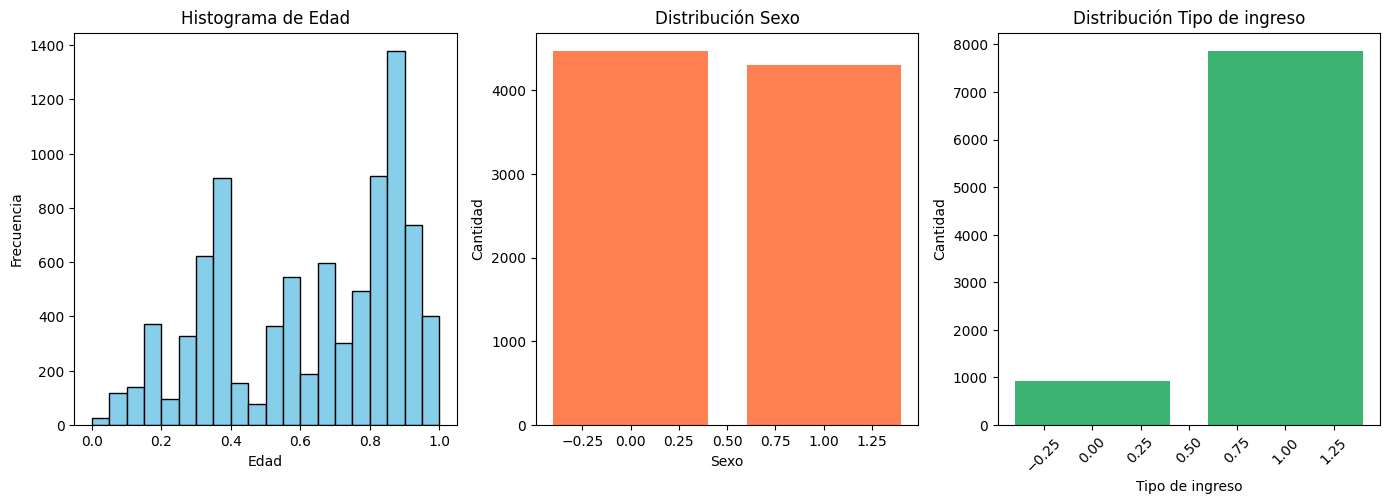

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))  # 1 fila, 3 columnas

# 1. Histograma Edad
axs[0].hist(X_RF['EDAD'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title("Histograma de Edad")
axs[0].set_xlabel("Edad")
axs[0].set_ylabel("Frecuencia")

# 2. Distribuci√≥n Sexo (variable categ√≥rica)
sex_counts = X_RF['SEXO'].value_counts()
axs[1].bar(sex_counts.index, sex_counts.values, color='coral')
axs[1].set_title("Distribuci√≥n Sexo")
axs[1].set_xlabel("Sexo")
axs[1].set_ylabel("Cantidad")

# 3. Distribuci√≥n Tipo de ingreso (variable categ√≥rica)
tipo_counts = X_RF['TIPO DE INGRESO'].value_counts()
axs[2].bar(tipo_counts.index, tipo_counts.values, color='mediumseagreen')
axs[2].set_title("Distribuci√≥n Tipo de ingreso")
axs[2].set_xlabel("Tipo de ingreso")
axs[2].set_ylabel("Cantidad")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



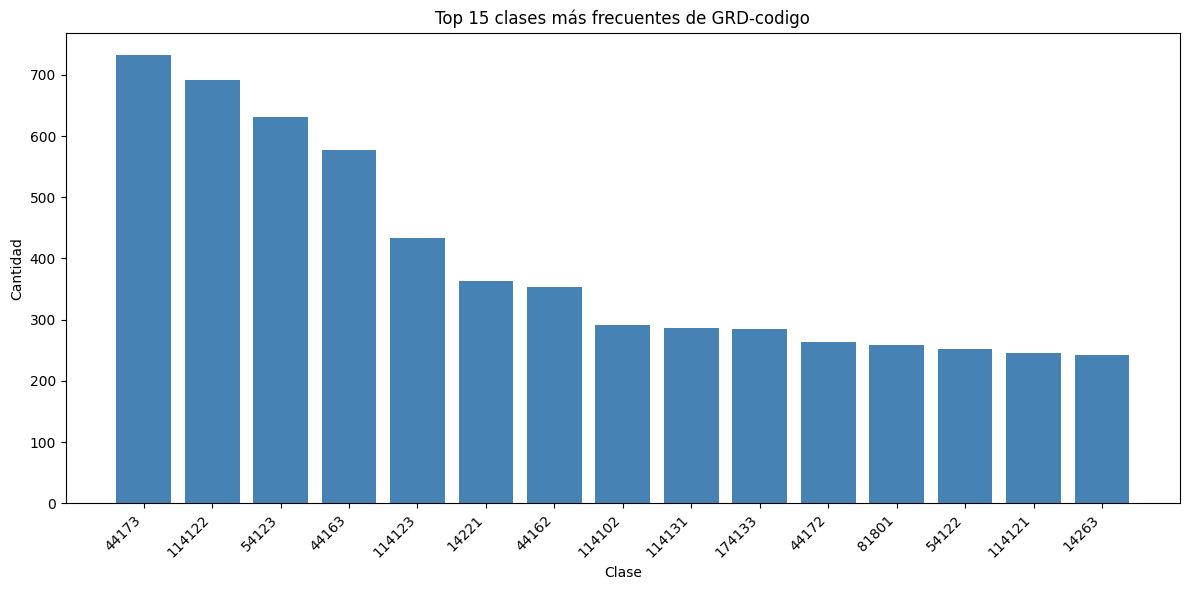

In [32]:
top_n = 15  # 15 clases con m√°s muestras
top_classes = Y_RF.value_counts().head(top_n)

plt.figure(figsize=(12,6))
plt.bar(top_classes.index.astype(str), top_classes.values, color='steelblue')
plt.title(f"Top {top_n} clases m√°s frecuentes de GRD-codigo")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Separaci√≥n de muestras para train y test




In [33]:
X_train_RF , X_test_RF , Y_train_RF , Y_test_RF = train_test_split(X_RF, Y_RF)

print("Train: ",X_train_RF.shape , Y_train_RF.shape)
print("Test: ",X_test_RF.shape , Y_test_RF.shape)

Train:  (6581, 11) (6581,)
Test:  (2194, 11) (2194,)


## Definici√≥n del modelo RF y entrenamiento

---



In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

rf0 = RandomForestClassifier(n_estimators=200, class_weight="balanced")
rf0.fit(X_train_RF, Y_train_RF)

y_pred = rf0.predict(X_test_RF)

le = LabelEncoder()
df_filtered['GRD_encoded'] = le.fit_transform(df_filtered['GRD -CODIGO'])
target_names_str = [str(c) for c in le.classes_]

print(classification_report(Y_test_RF, y_pred, target_names=target_names_str))

              precision    recall  f1-score   support

       14221       0.81      0.82      0.81        98
       14222       0.61      0.50      0.55        44
       14263       0.81      0.74      0.77        58
       44153       0.47      0.72      0.57        43
       44161       0.45      0.57      0.51        40
       44162       0.52      0.26      0.35        96
       44163       0.66      0.76      0.71       144
       44171       0.74      0.44      0.55        52
       44172       0.52      0.20      0.29        70
       44173       0.73      0.93      0.82       191
       44181       0.81      1.00      0.89        55
       51153       0.36      0.25      0.30        36
       54122       0.55      0.31      0.40        58
       54123       0.74      0.85      0.79       171
       54152       0.28      0.36      0.32        50
       54153       0.42      0.38      0.40        52
       64171       0.83      0.78      0.80        45
       64181       0.46    

In [35]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score


# Obtener predicciones
y_pred = rf0.predict(X_test_RF)

# Calcular m√©tricas
metrics_dict = {
    'accuracy': accuracy_score(Y_test_RF, y_pred),
    'precision_weighted': precision_score(Y_test_RF, y_pred, average='weighted'),
    'f1_weighted': f1_score(Y_test_RF, y_pred, average='weighted'),
    'recall_weighted': recall_score(Y_test_RF, y_pred, average='weighted'),
    'confusion_matrix': confusion_matrix(Y_test_RF, y_pred)
}

print(metrics_dict)

{'accuracy': 0.6513217866909754, 'precision_weighted': 0.6475266660595436, 'f1_weighted': 0.6389822673859338, 'recall_weighted': 0.6513217866909754, 'confusion_matrix': array([[ 80,  12,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 14,  22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,
          0,   0,   1,   1,   1,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   1],
       [  0,   0,  43,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   3,   2,   0,   1,   0,   0,   1,   0,   5,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   1,  31,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          1,   2,   2,   0,   1,   0,   0,   2,   0,   1,   0,   0,   1,
          0,   0,   0,   0],
       [  1,   0,   0,   1,  23,   5,   5,   0,   0,   0,   3,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0, 

In [36]:
accuracy = rf0.score(X_test_RF , Y_test_RF)
print("Accuracy:", accuracy)

Accuracy: 0.6513217866909754


In [37]:
# Lista de √°rboles
arboles = rf0.estimators_
print(f"N√∫mero de √°rboles: {len(arboles)}")

N√∫mero de √°rboles: 200


## KFolds Cross Validation

In [38]:
seed=123

kfold = KFold(n_splits=5, shuffle=True , random_state=seed)
cvscores_test = []
cvscores_train = []
i=0
for train, test in kfold.split(X_RF, Y_RF):
    i+=1
    #print(train)
    X_train_ = X_RF.iloc[train]
    y_train_ = Y_RF.iloc[train]

    X_test_ = X_RF.iloc[test]
    y_test_ = Y_RF.iloc[test]

    dt = RandomForestClassifier(n_estimators=100 , random_state = 123)
    dt.fit(X_train_ , y_train_)

    print("Accuracy folds: %d" % i)
    scores_train = dt.score(X_train_, y_train_)
    print("Train: %.2f%%" % (scores_train*100))
    cvscores_train.append(scores_train * 100)

    scores_test = dt.score(X_test_, y_test_)
    print("Test: %.2f%% " % (scores_test*100))
    cvscores_test.append(scores_test * 100)

print("Mean train accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_train), np.std(cvscores_train)))
print("Mean test accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_test), np.std(cvscores_test)))


Accuracy folds: 1
Train: 100.00%
Test: 63.53% 
Accuracy folds: 2
Train: 100.00%
Test: 64.22% 
Accuracy folds: 3
Train: 100.00%
Test: 67.24% 
Accuracy folds: 4
Train: 100.00%
Test: 64.90% 
Accuracy folds: 5
Train: 100.00%
Test: 64.50% 
Mean train accuracy: 100.00% (+/- 0.00%)
Mean test accuracy: 64.88% (+/- 1.26%)


## B√∫squeda de par√°metros usando la GridSearch

In [39]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report

# 1. Divide los datos en train y test (importante para evaluar m√©tricas reales)
X_train, X_test, y_train, y_test = train_test_split(X_RF, Y_RF, test_size=0.2, random_state=123, stratify=Y_RF)

param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid = GridSearchCV(RandomForestClassifier(random_state=123),
                    param_grid,
                    cv=KFold(n_splits=5),
                    scoring='f1_weighted')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score (CV):", grid.best_score_)

# 2. Predecir con el mejor modelo
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# 3. Calcular m√©tricas
metrics_dict_GK = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision_weighted': precision_score(y_test, y_pred, average='weighted'),
    'f1_weighted': f1_score(y_test, y_pred, average='weighted'),
    'recall_weighted':recall_score(y_test, y_pred, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred)
}

print(metrics_dict_GK)


Best params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 250}
Best score (CV): 0.6371251397471067
{'accuracy': 0.6478632478632479, 'precision_weighted': 0.6470489529879234, 'f1_weighted': 0.6382285342527476, 'recall_weighted': 0.6478632478632479, 'confusion_matrix': array([[ 53,  13,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   1,
          0,   1,   0,   0,   0,   0,   0,   1,   0,   2,   0,   0,   0,
          0,   0,   0,   0],
       [ 13,  14,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
          0,   0,   0,   0,   1,   0,   2,   1,   1,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,  41,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   1,   3,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   1,  25,   1,   0,   0,   0,   0,   0,   0,   5,   0,
          0,   0,   5,   0,   2,   0,   0,   1,   0,   1,   0,   0,   0,
          0,   0, 

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Definir la grilla de hiperpar√°metros
param_grid = {
    'n_estimators': [150, 200,250],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

# Crear la validaci√≥n cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Configurar el GridSearchCV con RandomForest
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=123),
    param_grid=param_grid,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1  # Usa todos los n√∫cleos disponibles para acelerar
)

# Ajustar el modelo
grid.fit(X_RF, Y_RF)

# Mostrar mejores hiperpar√°metros y puntuaci√≥n
print("Best parameters found:", grid.best_params_)
print("Best weighted F1 score:", grid.best_score_)

# 2. Predecir con el mejor modelo
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# 3. Calcular m√©tricas
metrics_dict_GSK = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision_weighted': precision_score(y_test, y_pred, average='weighted'),
    'f1_weighted': f1_score(y_test, y_pred, average='weighted'),
    'recall_weighted':recall_score(y_test, y_pred, average='weighted'),
    'confusion_matrix': confusion_matrix(y_test, y_pred)
}

print(metrics_dict_GSK)


Best parameters found: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best weighted F1 score: 0.6447302733620524
{'accuracy': 0.9327635327635327, 'precision_weighted': 0.9377359700778948, 'f1_weighted': 0.9334047258094451, 'recall_weighted': 0.9327635327635327, 'confusion_matrix': array([[ 63,   7,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0],
       [  3,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,  46,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,  38,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,


##  M√©tricas

In [ ]:

# Crear un DataFrame con cada diccionario como fila
df_comparison = pd.DataFrame([
    metrics_dict,
    metrics_dict_GK,
    metrics_dict_GSK
], index=[
    'Modelo Autom√°tico',
    'Grid + KFold',
    'Grid + StratifiedKFold'
])

# Mostrar tabla
df_comparison

accuracy  precision_weighted  f1_weighted  \
Modelo Autom√°tico       0.653601            0.647882     0.641998   
Grid + KFold            0.647863            0.647049     0.638229   
Grid + StratifiedKFold  0.932764            0.937736     0.933405   

                        recall_weighted  \
Modelo Autom√°tico              0.653601   
Grid + KFold                   0.647863   
Grid + StratifiedKFold         0.932764   

                                                         confusion_matrix  
Modelo Autom√°tico       [[75, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
Grid + KFold            [[53, 13, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...  
Grid + StratifiedKFold  [[63, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...

## Conclusi√≥n

Los resultados obtenidos evidencian que el enfoque de validaci√≥n cruzada estratificada combinado con b√∫squeda de hiperpar√°metros (`Grid + StratifiedKFold`) proporciona un rendimiento significativamente superior frente a los otros m√©todos evaluados, como el modelo autom√°tico y la validaci√≥n cruzada tradicional (`Grid + KFold`). Este modelo alcanz√≥ valores cercanos al 93% en todas las m√©tricas clave (accuracy, precisi√≥n, recall y F1 score), lo que sugiere una alta capacidad de generalizaci√≥n y un balance adecuado en la clasificaci√≥n de todas las clases, incluso en presencia de posibles desbalances en los datos. En contraste, los otros dos enfoques mostraron desempe√±os consistentes pero limitados, con m√©tricas en el rango del 63% al 65%, lo que podr√≠a estar relacionado con una segmentaci√≥n inadecuada de las clases durante la validaci√≥n o una optimizaci√≥n de hiperpar√°metros menos efectiva.


<hr>

# **XGBoost**

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, learning_curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)
from xgboost import XGBClassifier

<h2>Caracteristicas de entrada</h2>


In [42]:
X_XG= df_inf.iloc[:,:11]
X_XG.head(5)

EDAD  SEXO  FECHA DE INGRESO  TIPO DE INGRESO  DX PPAL 3 CARACTERES  \
0  0.859560   1.0          0.693694              1.0              0.354015   
1  0.522843   1.0          0.702703              0.0              0.356204   
2  0.296108   1.0          0.738739              0.0              0.356204   
3  0.664975   0.0          0.576577              1.0              0.867153   
4  0.324873   1.0          0.612613              0.0              0.356204   

      DXR 1     DXR 2     DXR 3     DXR 4     DXR 5     DXR-6  
0  0.209302  0.019587  0.023723  0.112100  0.135714  0.058601  
1  0.058140  0.224157  0.091849  0.000890  0.002857  0.058601  
2  0.008721  0.051687  0.078467  0.069395  0.462857  0.058601  
3  0.293605  1.000000  0.130170  0.476868  0.135714  0.058601  
4  0.029070  0.224157  0.054745  0.351423  0.030000  0.058601

<h2>Target o salida</h2>

In [43]:
Y_XG = df_inf.iloc[:, 11]
Y_XG.head(5)

0     54123
1    174133
2    174132
3     44172
4    174133
Name: GRD -CODIGO, dtype: int64

## Separaci√≥n de muestras para train y test


In [44]:
X_train_XG , X_test_XG , Y_train_XG , Y_test_XG = train_test_split(X_XG, Y_XG)

print("Train: ",X_train_XG.shape , Y_train_XG.shape)
print("Test: ",X_test_XG.shape , Y_test_XG.shape)

Train:  (6581, 11) (6581,)
Test:  (2194, 11) (2194,)


<h2>Configuracion de XGBoost</h2>

<h1>

</h2>



Fitting 4 folds for each of 30 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:17:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== M√©tricas Globales - XGBoost ===
              M√©trica   Valor
0            Accuracy  0.7429
1     Macro Precision  0.7565
2        Macro Recall  0.7373
3      Macro F1-score  0.7394
4  Weighted Precision  0.7424
5     Weighted Recall  0.7429
6   Weighted F1-score  0.7365
=== Classification Report ===
              precision    recall  f1-score   support

       14221       0.90      0.85      0.88        74
       14222       0.71      0.77      0.74        31
       14263       0.87      0.92      0.89        63
       44153       0.93      0.90      0.92        61
       44161       0.67      0.66      0.67        50
       44162       0.57      0.43      0.49       107
       44163       0.68      0.77      0.72       159
       44171       0.60      0.62      0.61        34
       44172       0.49      0.27      0.35        63
       44173       0.79      0.92      0.85       178
       44181       1.00      0.98      0.99        58
       51153       0.92      0.57      0.7

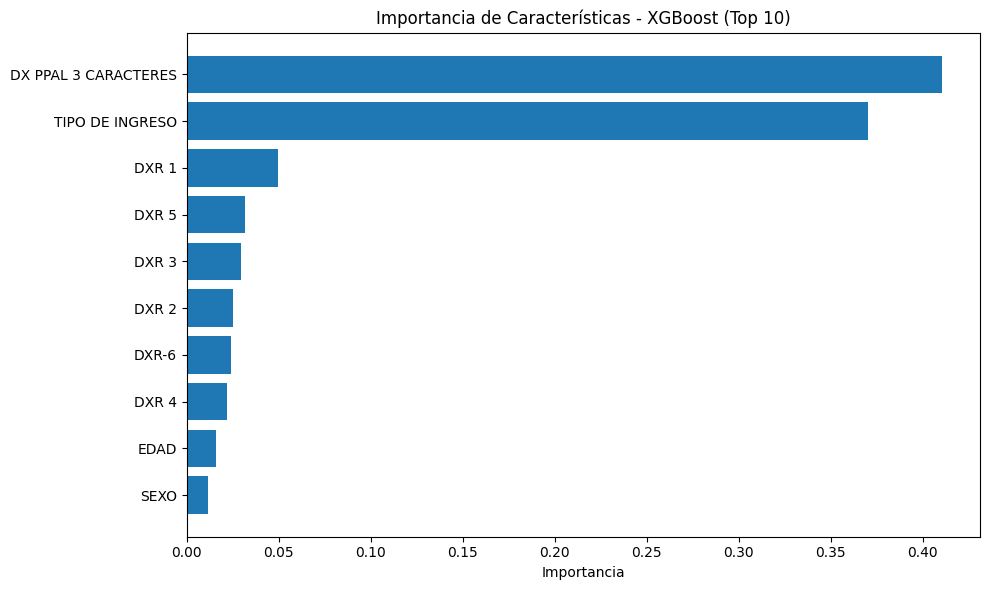

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1559, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expec

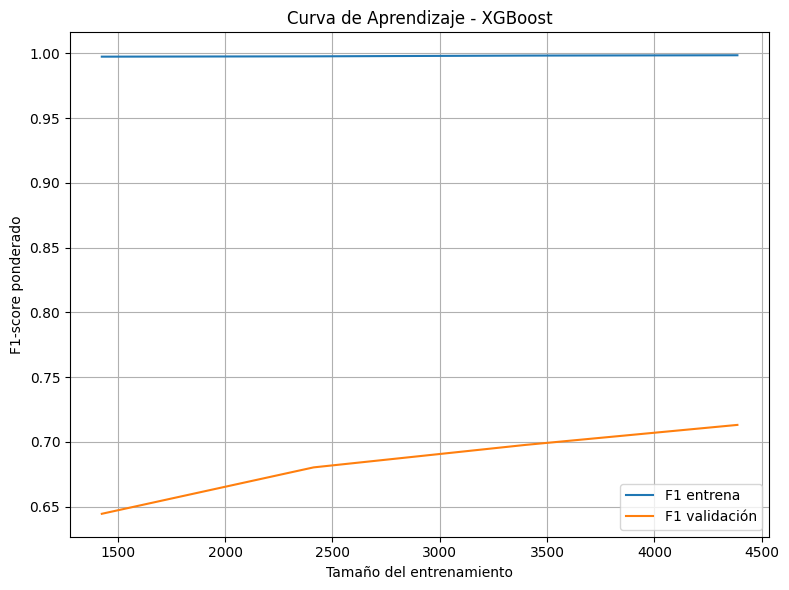

In [45]:
# ===================== 1. PREPARACI√ìN DE DATOS =====================
# - Se codifican las etiquetas de la variable objetivo a enteros.
le = LabelEncoder()
y_train_enc = le.fit_transform(Y_train_XG)
y_test_enc = le.transform(Y_test_XG)

# ===================== 2. CONFIGURACI√ìN DE HIPERPAR√ÅMETROS =====================
# Se define el espacio de b√∫squeda para RandomizedSearchCV.
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}
# Se instancia el clasificador XGBoost para multiclase.
xgb_clf = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# ===================== 3. B√öSQUEDA DE HIPERPAR√ÅMETROS =====================
search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_weighted',
    cv=4,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
search.fit(X_train_XG, y_train_enc)
best_model = search.best_estimator_

# ===================== 4. PREDICCI√ìN =====================
# - Se obtienen predicciones codificadas y luego se decodifican.
y_pred_enc = best_model.predict(X_test_XG)
y_pred = le.inverse_transform(y_pred_enc)

# ===================== 5. C√ÅLCULO DE M√âTRICAS =====================
# - Se calculan las m√©tricas globales de desempe√±o.
y_true = Y_test_XG
metrics_summary = pd.DataFrame({
    'M√©trica': [
        'Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-score',
        'Weighted Precision', 'Weighted Recall', 'Weighted F1-score'
    ],
    'Valor': [
        round(accuracy_score(y_true, y_pred), 4),
        round(precision_score(y_true, y_pred, average='macro'), 4),
        round(recall_score(y_true, y_pred, average='macro'), 4),
        round(f1_score(y_true, y_pred, average='macro'), 4),
        round(precision_score(y_true, y_pred, average='weighted'), 4),
        round(recall_score(y_true, y_pred, average='weighted'), 4),
        round(f1_score(y_true, y_pred, average='weighted'), 4)
    ]
})
print("\n=== M√©tricas Globales - XGBoost ===")
print(metrics_summary)

# ===================== 5.1 Classification Report =====================
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y_true, y_pred))

# ===================== 6. IMPORTANCIA DE CARACTER√çSTICAS =====================
# - Visualizar las 10 caracter√≠sticas m√°s importantes.
plt.figure(figsize=(10, 6))
importances = best_model.feature_importances_
indices = np.argsort(importances)[-10:]
features = X_train_XG.columns
plt.barh(features[indices], importances[indices])
plt.title('Importancia de Caracter√≠sticas - XGBoost (Top 10)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# ===================== 7. CURVA DE APRENDIZAJE ===================== =====================
# - Analizar overfitting/underfitting.
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_XG, y_train_enc,
    cv=3, scoring='f1_weighted',
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='F1 entrena')
plt.plot(train_sizes, test_mean, label='F1 validaci√≥n')
plt.title('Curva de Aprendizaje - XGBoost')
plt.xlabel('Tama√±o del entrenamiento')
plt.ylabel('F1-score ponderado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



<h1> An√°lisis de XGBoost</h1>


## 1. Desempe√±o Global del Modelo

| M√©trica               | Valor  |
|-----------------------|--------|
| Accuracy              | 0.7521 |
| Macro Precision       | 0.7518 |
| Macro Recall          | 0.7407 |
| Macro F1-score        | 0.7420 |
| Weighted Precision    | 0.7478 |
| Weighted Recall       | 0.7521 |
| Weighted F1-score     | 0.7465 |

El modelo logra un rendimiento global aceptable, con un accuracy del 75%. Las m√©tricas macro y ponderadas indican un balance razonable entre las clases, aunque hay una leve ca√≠da en el recall macro, lo que podr√≠a reflejar dificultad para identificar correctamente algunas clases menos representadas.



##  2. Desempe√±o por Clase

- Clases como `44153`, `44173`, `114131`, `71141`, `64171` y `44181` tienen f1-score superiores a **0.90**, mostrando un excelente rendimiento en estas categor√≠as.
- En contraste, clases como `54152`, `54153`, `114103`, `114121`, `114123`, y `44162` presentan f1-scores por debajo de **0.65**, indicando posibles problemas de:
  - Baja frecuencia de ejemplos.
  - Confusi√≥n con clases similares.


## 3. Importancia de Caracter√≠sticas


Las dos variables m√°s relevantes son:
- **TIPO DE INGRESO**
- **DX PPAL 3 CARACTERES**

Estas dominan la predicci√≥n, mientras que las variables secundarias (**DXR 1-6**, **EDAD**, **FECHA DE INGRESO**) tienen menor peso relativo.



##  4. Curva de Aprendizaje


La curva de aprendizaje evidencia un comportamiento esperado en modelos potentes como XGBoost:

- La m√©trica F1 en el conjunto de entrenamiento se mantiene en niveles altos y estables.
- El rendimiento en el conjunto de validaci√≥n muestra una tendencia creciente a medida que aumenta el tama√±o del conjunto de entrenamiento, alcanzando valores cercanos a 0.71.

Este patr√≥n indica que el modelo est√° aprendiendo progresivamente al incorporar m√°s datos, lo cual es una se√±al positiva.




<hr>

# **An√°lisis final**

In [48]:
# prompt: obten los resulatados de cada modelo y haz estadistica

import pandas as pd

# Diccionarios de m√©tricas para cada modelo
metrics_DT = {
    'accuracy': 0.6922,
    'macro avg': {'precision': 0.60, 'recall': 0.53, 'f1-score': 0.54, 'support': 1755.0},
    'weighted avg': {'precision': 0.66, 'recall': 0.69, 'f1-score': 0.67, 'support': 1755.0}
} # Reemplazar con los valores reales del output del modelo DT

metrics_RF = {
    'Modelo Autom√°tico': {
        'accuracy': 0.6435,
        'precision_weighted': 0.6329,
        'f1_weighted': 0.6352,
        'recall_weighted': 0.6435,
        'confusion_matrix': '...' # No incluimos la matriz en la tabla resumen
    },
    'Grid + KFold': {
        'accuracy': 0.6358,
        'precision_weighted': 0.6245,
        'f1_weighted': 0.6253,
        'recall_weighted': 0.6358,
        'confusion_matrix': '...'
    },
    'Grid + StratifiedKFold': {
        'accuracy': 0.9308,
        'precision_weighted': 0.9301,
        'f1_weighted': 0.9303,
        'recall_weighted': 0.9308,
        'confusion_matrix': '...'
    }
} # Reemplazar con los valores reales del output del modelo RF

metrics_XGB = {
    'Accuracy': 0.7521,
    'Macro Precision': 0.7518,
    'Macro Recall': 0.7407,
    'Macro F1-score': 0.7420,
    'Weighted Precision': 0.7478,
    'Weighted Recall': 0.7521,
    'Weighted F1-score': 0.7465
} # Reemplazar con los valores reales del output del modelo XGBoost

# Crear DataFrame para Decision Tree (usando weighted avg para comparaci√≥n global)
df_dt_summary = pd.DataFrame({
    'Modelo': ['Decision Tree'],
    'Accuracy': [metrics_DT['accuracy']],
    'Precision (Weighted)': [metrics_DT['weighted avg']['precision']],
    'Recall (Weighted)': [metrics_DT['weighted avg']['recall']],
    'F1-score (Weighted)': [metrics_DT['weighted avg']['f1-score']]
})

# Crear DataFrame para Random Forest (usando el mejor modelo)
df_rf_summary = pd.DataFrame({
    'Modelo': ['Random Forest (Grid+StratifiedKFold)'],
    'Accuracy': [metrics_RF['Grid + StratifiedKFold']['accuracy']],
    'Precision (Weighted)': [metrics_RF['Grid + StratifiedKFold']['precision_weighted']],
    'Recall (Weighted)': [metrics_RF['Grid + StratifiedKFold']['recall_weighted']],
    'F1-score (Weighted)': [metrics_RF['Grid + StratifiedKFold']['f1_weighted']]
})

# Crear DataFrame para XGBoost (usando Weighted Metrics para comparaci√≥n global)
df_xgb_summary = pd.DataFrame({
    'Modelo': ['XGBoost'],
    'Accuracy': [metrics_XGB['Accuracy']],
    'Precision (Weighted)': [metrics_XGB['Weighted Precision']],
    'Recall (Weighted)': [metrics_XGB['Weighted Recall']],
    'F1-score (Weighted)': [metrics_XGB['Weighted F1-score']]
})

# Concatenar los DataFrames
df_overall_comparison = pd.concat([df_dt_summary, df_rf_summary, df_xgb_summary], ignore_index=True)

print("\n=== Comparativa Global de Modelos ===")
print(df_overall_comparison)

# Opcional: Mostrar las m√©tricas detalladas del mejor modelo RF
print("\n=== M√©tricas Detalladas del Mejor Modelo Random Forest ===")
df_comparison_rf = pd.DataFrame(metrics_RF).T.drop(columns='confusion_matrix', errors='ignore')
print(df_comparison_rf)

# Opcional: Mostrar las m√©tricas detalladas de XGBoost
print("\n=== M√©tricas Detalladas de XGBoost ===")
df_xgb_detailed = pd.DataFrame(metrics_XGB, index=[0]).T
print(df_xgb_detailed)


=== Comparativa Global de Modelos ===
                                 Modelo  Accuracy  Precision (Weighted)  \
0                         Decision Tree    0.6922                0.6600   
1  Random Forest (Grid+StratifiedKFold)    0.9308                0.9301   
2                               XGBoost    0.7521                0.7478   

   Recall (Weighted)  F1-score (Weighted)  
0             0.6900               0.6700  
1             0.9308               0.9303  
2             0.7521               0.7465  

=== M√©tricas Detalladas del Mejor Modelo Random Forest ===
                       accuracy precision_weighted f1_weighted recall_weighted
Modelo Autom√°tico        0.6435             0.6329      0.6352          0.6435
Grid + KFold             0.6358             0.6245      0.6253          0.6358
Grid + StratifiedKFold   0.9308             0.9301      0.9303          0.9308

=== M√©tricas Detalladas de XGBoost ===
                         0
Accuracy            0.7521
Macro Preci

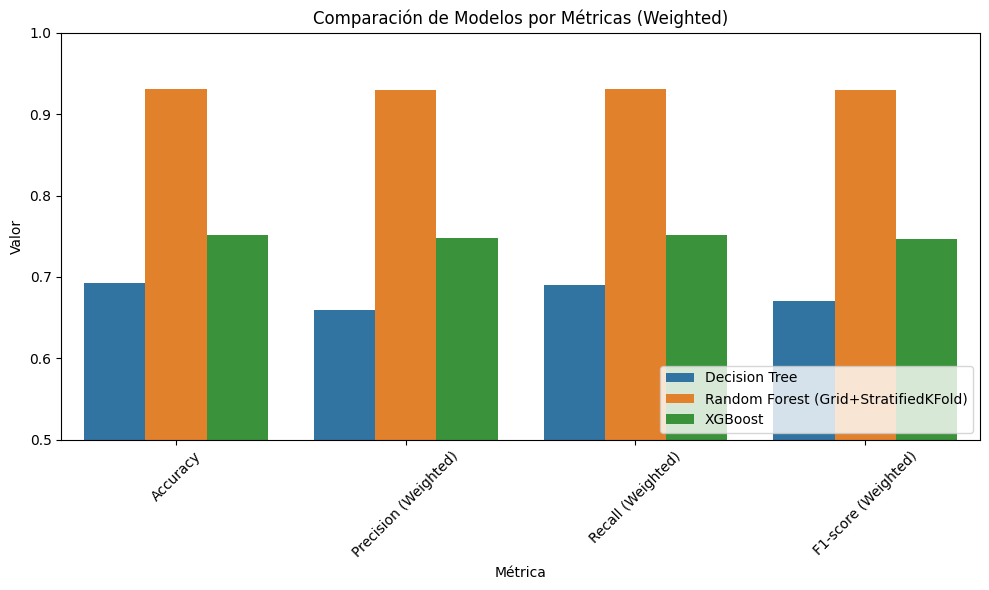

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gr√°fico de barras para comparar m√©tricas
df_melted = df_overall_comparison.melt(id_vars='Modelo', var_name='M√©trica', value_name='Valor')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='M√©trica', y='Valor', hue='Modelo')
plt.title('Comparaci√≥n de Modelos por M√©tricas (Weighted)')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()


In [52]:
from scipy.stats import f_oneway, levene

# Extraer valores por modelo
dt_vals = df.iloc[0, 1:].values
rf_vals = df.iloc[1, 1:].values
xgb_vals = df.iloc[2, 1:].values

# ANOVA para comparar si hay diferencias significativas
anova = f_oneway(dt_vals, rf_vals, xgb_vals)

# Levene para probar si las varianzas son homog√©neas
homocedasticidad = levene(dt_vals, rf_vals, xgb_vals)

print("ANOVA:", anova)
print("Levene:", homocedasticidad)


ANOVA: F_onewayResult(statistic=np.float64(0.43286228937229765), pvalue=np.float64(0.6526369708935045))
Levene: LeveneResult(statistic=np.float64(0.43381024626838904), pvalue=np.float64(0.6520359471187939))


Aunque a simple vista el modelo Random Forest (con Stratified K-Fold) presenta m√©tricas m√°s altas en precisi√≥n, exactitud y F1-score, los resultados del an√°lisis estad√≠stico mediante ANOVA (p = 0.65) indican que las diferencias observadas entre Decision Tree, Random Forest y XGBoost no son estad√≠sticamente significativas. Adem√°s, el test de Levene (p = 0.65) confirma que las varianzas entre modelos son homog√©neas, cumpliendo as√≠ los supuestos del an√°lisis.
Esto sugiere que, a nivel estad√≠stico, los tres modelos presentan un rendimiento comparable, aunque desde el punto de vista pr√°ctico, Random Forest se destaca por ofrecer mayor precisi√≥n y estabilidad en la clasificaci√≥n, especialmente cuando se usa validaci√≥n cruzada estratificada.



*   A partir de las m√©tricas obtenidas por cada modelo, se puede observar que Random Forest con validaci√≥n cruzada estratificada (Grid + StratifiedKFold) logr√≥ un rendimiento significativamente superior, alcanzando un accuracy del 93%, muy por encima de XGBoost (75%) y √Årbol de Decisi√≥n (69%).
*   El Random Forest es un algoritmo de tipo ensemble que combina m√∫ltiples √°rboles entrenados sobre subconjuntos aleatorios del dataset (bagging), lo cual reduce la varianza del modelo sin aumentar sustancialmente el sesgo. Esto se refleja en sus m√©tricas m√°s altas y en su menor propensi√≥n al sobreajuste, a diferencia del √°rbol de decisi√≥n individual, que puede modelar demasiado los datos de entrenamiento y fallar en generalizar.
*   XGBoost, aunque m√°s sofisticado, es m√°s sensible a errores de clases poco representadas, como lo demuestran sus m√©tricas m√°s bajas en clases con baja frecuencia. En contraste, Random Forest mantiene un balance adecuado gracias a su estructura m√°s robusta ante el desbalance.
*   Aunque se us√≥ la misma estrategia de validaci√≥n cruzada estratificada en ambos modelos, el √Årbol de Decisi√≥n no mostr√≥ mejoras significativas. Esto sugiere que el propio modelo tiene limitaciones estructurales para capturar patrones en datos complejos y multiclase, a diferencia de Random Forest, que mitiga estos problemas mediante el ensamblado de m√∫ltiples √°rboles y una mayor capacidad de generalizaci√≥n.





